# Pulse oximeter data experiments
## Initialization

In [1]:
%matplotlib inline

In [67]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=7):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_lowpass(cut, fs, order=7):
    nyq = 0.5 * fs
    cut = cut / nyq
    b, a = butter(order, [cut], btype='low')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def butter_lowpass_filter(data, cut, fs, order=5):
    b, a = butter_lowpass(cut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def load_dataset(filename):
    return pandas.read_csv(
        filename,
        header=None,
        names=['ts', 'raw', 'dc_filter', 'md_filter']
    )

def load_dataset_red(filename):
    return pandas.read_csv(
        filename,
        header=None,
        names=['ts', 'ir_raw', 'ir_dc_filter', 'ir_md_filter', 'red_dc_filter', 'dc_ir', 'dc_red', 'red_raw', 'ambient_raw']
    )

## Nellcor casing, finger on detector, IR LED

The timings used are as follows:

* `duty_on` is set to 5000.
* `duty_wait` is set to 4.

In [3]:
data_covered_ir_led = load_dataset('data-clip-w30-finger-ir-led.txt')[:1000]

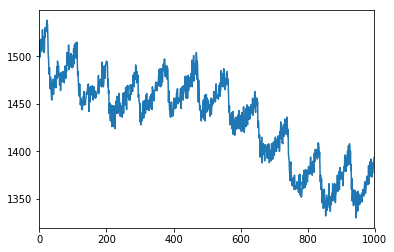

In [4]:
# Show raw data.
data_covered_ir_led['raw'].plot()

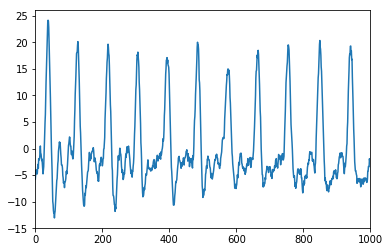

In [5]:
# Show DC and mean-diff filtered data.
(data_covered_ir_led['md_filter'] / 100).plot()

## Nellcor casing, finger on detector, IR+RED LED

The timings used are as follows:

* IR LED
  * `duty_on` is set to 5000.
  * `duty_wait` is set to 4.
* RED LED
  * `duty_on` is set to 1000.
  * `duty_wait` is set to 4.

In [70]:
data = load_dataset_red('data-clip-finger-ir-red-led.txt')[:1000]

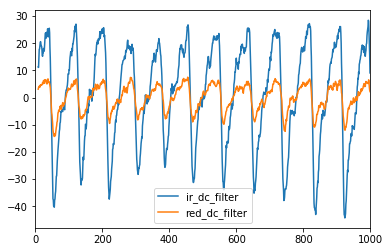

In [71]:
# Show raw data.
(data[['ir_dc_filter', 'red_dc_filter']] / 100).rolling(window=10).mean().plot()

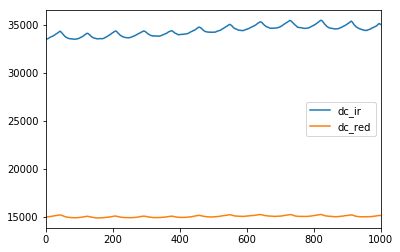

In [72]:
data[['dc_ir', 'dc_red']].plot()

In [73]:
norm_ir = data['ir_dc_filter'] / data['dc_ir']
norm_red = data['red_dc_filter'] / data['dc_red']

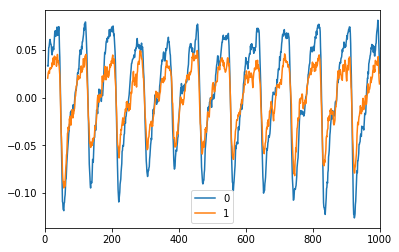

In [77]:
pandas.concat([norm_ir, norm_red], axis=1).rolling(window=10).mean().plot()

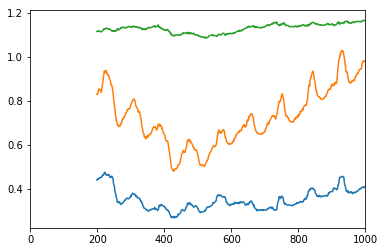

In [97]:
window = 200
red = (norm_red ** 2).rolling(window=window).sum()
ir = (norm_ir ** 2).rolling(window=window).sum()
ratio = np.log(np.sqrt(red / window)) / np.log(np.sqrt(ir / window))

red.plot()
ir.plot()
ratio.plot()

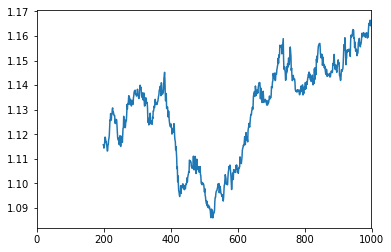

In [114]:
ratio.plot()